In [87]:
from __future__ import annotations

import json
import os
import re
from pathlib import Path
from typing import (
    Any,
    Union,  # noqa: F401
)
import random
import numpy as np
import pandas as pd
import anndata as ad
from scanpy import logging as logg
from scipy.sparse import csr_matrix
from sklearn import neighbors
import squidpy as sq
import scanpy as sc
import scipy

from squidpy._constants._pkg_constants import Key
from squidpy.datasets._utils import PathLike
from squidpy.read._utils import _load_image, _read_counts


import sys

sys.path.append('/home1/2254704l/unroll_package')

import unroll_package_functions as unroll

In [88]:
naive1_visium = unroll.visium("/datastore3/RossOlympia/Naive_1/Naive1/outs", counts_file="filtered_feature_bc_matrix.h5", library_id = "Naive")
naive1_visium.obs["total_counts"] = np.sum(naive1_visium.X, axis = 1)
naive1_visium.var_names_make_unique()

#Load in location IDs
location_id = pd.read_csv("/datastore3/RossOlympia/Naive_1/myannotationNaive1All_V5.csv", index_col = 0)
naive1_visium.obs["location"] = location_id
naive1_visium.obs["spot_id"] =  naive1_visium.obs.index

basement_id = pd.read_csv("/datastore3/RossOlympia/Naive_1/naive1_basement_layer.csv", index_col = 0)
naive1_visium.obs["basement_layer"] = basement_id
# sq.pl.spatial_scatter(day7_visium, color = "basement_layer")

basement_id = pd.read_csv("/datastore3/RossOlympia/Naive_1/centre_Naive1.csv", index_col = 0)
naive1_visium.obs["centre"] = basement_id
# sq.pl.spatial_scatter(day7_visium, color = "centre")

naive1_visium.obs['location'] = naive1_visium.obs['location'].replace({np.nan:"unlabelled"})

naive1_visium.obs['location']=naive1_visium.obs['location'].astype('str').astype('category')

naive1_visium.obs['location']= naive1_visium.obs['location'].cat.rename_categories(['Crypts', 'Villi', 'unlabelled'])



naive1_visium.obs['basement_layer'] = naive1_visium.obs['basement_layer'].replace({np.nan:"unlabelled"})

naive1_visium.obs['basement_layer']=naive1_visium.obs['basement_layer'].astype('str').astype('category')

naive1_visium.obs['basement_layer']= naive1_visium.obs['basement_layer'].cat.rename_categories(['basement', 'unlabelled', 'upper'])


/home1/2254704l/.local/lib/python3.10/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


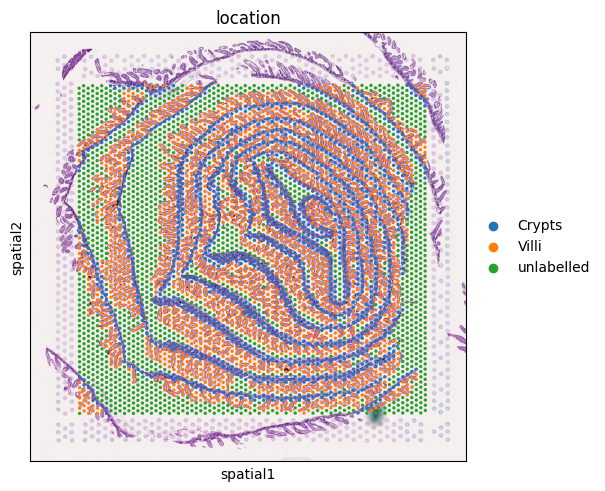

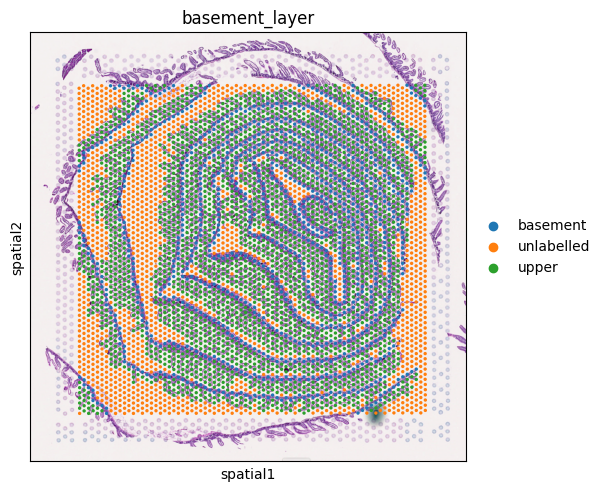

In [89]:
sq.pl.spatial_scatter(naive1_visium, color = "location")
sq.pl.spatial_scatter(naive1_visium, color = "basement_layer")

/home1/2254704l/unroll_package/unroll_package_functions.py:264: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_out["graph_cluster"].iloc[current_index] = str(counter)
/home1/2254704l/unroll_package/unroll_package_functions.py:264: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_out["graph_cluster"].iloc[current_index] = str(counter)
/home1/2254704l/unroll_package/unroll_package_functions.py:313: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-vi

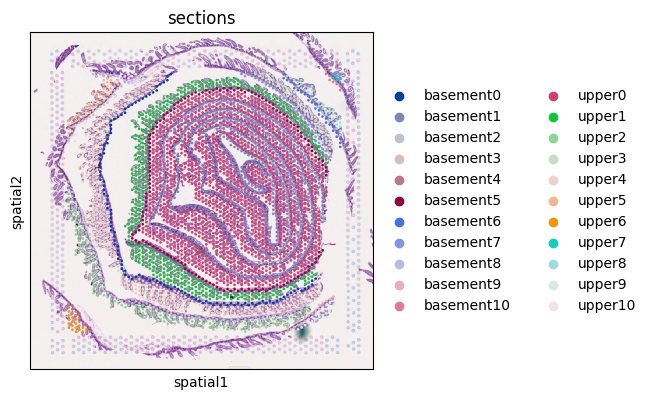

In [90]:
naive1_visium_sections = unroll.seperate_sections(naive1_visium, obs_column = "location", spatial_name = "spatial", nn_radius = 33)
sq.pl.spatial_scatter(naive1_visium_sections, color = "sections")

naive1_visium_sections[naive1_visium_sections.obs['location'] != "unlabelled"].write("/datastore3/RossOlympia/Naive_1/naive1_noUnlabelled_partioned.h5ad")

[527.4550268429283, 734.405151203333]
[734.405151203333, 861.7695909410279]
[981.8594985849152, 1152.4653037579478]
[954.8538205020053, 1067.970827716775]
[861.7695909410279, 981.8594985849152]
[1142.4253312755397, 1189.4785183363094]


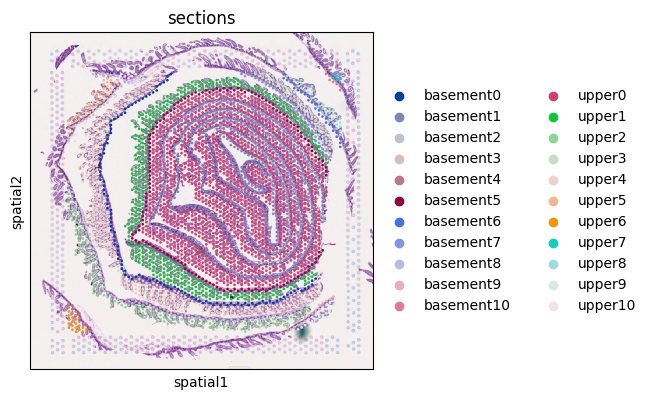

In [91]:
sq.pl.spatial_scatter(naive1_visium_sections, color = "sections")
centre_coordinates = pd.DataFrame({'0':[np.mean(naive1_visium_sections.obsm['spatial'][:,0])], '1':[np.mean(naive1_visium_sections.obsm['spatial'][:,1])]})

match_df = unroll.match_and_merge(naive1_visium_sections, basement_inside = True ,centre_coordinates = centre_coordinates)


In [92]:
match_df

upper   basement
0  upper0  basement1
1  upper1  basement5
2  upper2  basement2
3  upper3  basement7
4  upper4  basement0
5  upper5  basement3
6  upper6  basement4
7  upper8  basement6
8  upper9  basement9

In [93]:
adjustedSpatial_datasets = unroll.getNewSpatial(naive1_visium_sections, match_df)


/home1/2254704l/unroll_package/unroll_package_functions.py:607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  start_dist_df[upper][basement] = distance_result


Lineages: [Lineage[18, 1, 8, 0, 11, 9, 10, 3, 5, 7, 6, 2, 13, 12, 4, 14, 17, 15, 16]]


  0%|                                                                                                                                                                                   | 0/1 [00:00<?, ?it/s]/home1/2254704l/.local/lib/python3.10/site-packages/pyslingshot/slingshot.py:329: RuntimeWarning: invalid value encountered in divide
  cell_weights = z_prime / np.nanmax(z_prime, axis=1, keepdims=True) #rowMins(D) / D
100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.20it/s]


Reversing from leaf to root
Lineages: [Lineage[2, 8, 5, 4, 6, 1, 3, 0, 9, 7, 10, 11]]


  0%|                                                                                                                                                                                   | 0/1 [00:00<?, ?it/s]/home1/2254704l/.local/lib/python3.10/site-packages/pyslingshot/slingshot.py:329: RuntimeWarning: invalid value encountered in divide
  cell_weights = z_prime / np.nanmax(z_prime, axis=1, keepdims=True) #rowMins(D) / D
100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  9.47it/s]

Reversing from leaf to root



/home1/2254704l/unroll_package/unroll_package_functions.py:607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  start_dist_df[upper][basement] = distance_result


Lineages: [Lineage[2, 4, 5, 1, 7, 0, 3, 6, 8]]


  0%|                                                                                                                                                                                   | 0/1 [00:00<?, ?it/s]/home1/2254704l/.local/lib/python3.10/site-packages/pyslingshot/slingshot.py:329: RuntimeWarning: invalid value encountered in divide
  cell_weights = z_prime / np.nanmax(z_prime, axis=1, keepdims=True) #rowMins(D) / D
100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  9.24it/s]

Reversing from leaf to root
Lineages: [Lineage[5, 6, 3, 1, 0, 2, 4]]



  0%|                                                                                                                                                                                   | 0/1 [00:00<?, ?it/s]/home1/2254704l/.local/lib/python3.10/site-packages/pyslingshot/slingshot.py:329: RuntimeWarning: invalid value encountered in divide
  cell_weights = z_prime / np.nanmax(z_prime, axis=1, keepdims=True) #rowMins(D) / D
100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 41.39it/s]


Reversing from leaf to root


/home1/2254704l/unroll_package/unroll_package_functions.py:607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  start_dist_df[upper][basement] = distance_result


Lineages: [Lineage[5, 2, 1, 0, 7, 4, 3, 6]]


  0%|                                                                                                                                                                                   | 0/1 [00:00<?, ?it/s]/home1/2254704l/.local/lib/python3.10/site-packages/pyslingshot/slingshot.py:329: RuntimeWarning: invalid value encountered in divide
  cell_weights = z_prime / np.nanmax(z_prime, axis=1, keepdims=True) #rowMins(D) / D
100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 28.64it/s]


Reversing from leaf to root
Lineages: [Lineage[1, 0, 3, 4, 2]]


  0%|                                                                                                                                                                                   | 0/1 [00:00<?, ?it/s]/home1/2254704l/.local/lib/python3.10/site-packages/pyslingshot/slingshot.py:329: RuntimeWarning: invalid value encountered in divide
  cell_weights = z_prime / np.nanmax(z_prime, axis=1, keepdims=True) #rowMins(D) / D
100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 66.60it/s]


Reversing from leaf to root


/home1/2254704l/unroll_package/unroll_package_functions.py:607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  start_dist_df[upper][basement] = distance_result


Lineages: [Lineage[0, 3, 2, 1]]


  0%|                                                                                                                                                                                   | 0/1 [00:00<?, ?it/s]/home1/2254704l/.local/lib/python3.10/site-packages/pyslingshot/slingshot.py:329: RuntimeWarning: invalid value encountered in divide
  cell_weights = z_prime / np.nanmax(z_prime, axis=1, keepdims=True) #rowMins(D) / D
100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 120.69it/s]


Reversing from leaf to root
Lineages: [Lineage[0, 2, 1]]


  0%|                                                                                                                                                                                   | 0/1 [00:00<?, ?it/s]/home1/2254704l/.local/lib/python3.10/site-packages/pyslingshot/slingshot.py:329: RuntimeWarning: invalid value encountered in divide
  cell_weights = z_prime / np.nanmax(z_prime, axis=1, keepdims=True) #rowMins(D) / D
100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 207.05it/s]


Reversing from leaf to root


/home1/2254704l/unroll_package/unroll_package_functions.py:607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  start_dist_df[upper][basement] = distance_result


Lineages: [Lineage[5, 3, 0, 1, 6, 2, 4]]


  0%|                                                                                                                                                                                   | 0/1 [00:00<?, ?it/s]/home1/2254704l/.local/lib/python3.10/site-packages/pyslingshot/slingshot.py:329: RuntimeWarning: invalid value encountered in divide
  cell_weights = z_prime / np.nanmax(z_prime, axis=1, keepdims=True) #rowMins(D) / D
100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 13.90it/s]


Reversing from leaf to root
Lineages: [Lineage[4, 5, 0, 2, 3, 1]]


  0%|                                                                                                                                                                                   | 0/1 [00:00<?, ?it/s]/home1/2254704l/.local/lib/python3.10/site-packages/pyslingshot/slingshot.py:329: RuntimeWarning: invalid value encountered in divide
  cell_weights = z_prime / np.nanmax(z_prime, axis=1, keepdims=True) #rowMins(D) / D
100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 69.98it/s]


Reversing from leaf to root


/home1/2254704l/unroll_package/unroll_package_functions.py:607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  start_dist_df[upper][basement] = distance_result


Lineages: [Lineage[0, 2, 1]]


  0%|                                                                                                                                                                                   | 0/1 [00:00<?, ?it/s]/home1/2254704l/.local/lib/python3.10/site-packages/pyslingshot/slingshot.py:329: RuntimeWarning: invalid value encountered in divide
  cell_weights = z_prime / np.nanmax(z_prime, axis=1, keepdims=True) #rowMins(D) / D
100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 139.74it/s]


Reversing from leaf to root
Lineages: [Lineage[2, 1, 0]]


  0%|                                                                                                                                                                                   | 0/1 [00:00<?, ?it/s]/home1/2254704l/.local/lib/python3.10/site-packages/pyslingshot/slingshot.py:329: RuntimeWarning: invalid value encountered in divide
  cell_weights = z_prime / np.nanmax(z_prime, axis=1, keepdims=True) #rowMins(D) / D
100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 254.77it/s]

Reversing from leaf to root



/home1/2254704l/unroll_package/unroll_package_functions.py:607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  start_dist_df[upper][basement] = distance_result


Lineages: [Lineage[0, 1]]


  0%|                                                                                                                                                                                   | 0/1 [00:00<?, ?it/s]/home1/2254704l/.local/lib/python3.10/site-packages/pyslingshot/slingshot.py:329: RuntimeWarning: invalid value encountered in divide
  cell_weights = z_prime / np.nanmax(z_prime, axis=1, keepdims=True) #rowMins(D) / D
100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 266.22it/s]


Reversing from leaf to root
Lineages: [Lineage[1, 0]]


  0%|                                                                                                                                                                                   | 0/1 [00:00<?, ?it/s]/home1/2254704l/.local/lib/python3.10/site-packages/pyslingshot/slingshot.py:329: RuntimeWarning: invalid value encountered in divide
  cell_weights = z_prime / np.nanmax(z_prime, axis=1, keepdims=True) #rowMins(D) / D
100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 327.78it/s]


Reversing from leaf to root


/home1/2254704l/unroll_package/unroll_package_functions.py:607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  start_dist_df[upper][basement] = distance_result


Lineages: [Lineage[2, 1, 0]]


  0%|                                                                                                                                                                                   | 0/1 [00:00<?, ?it/s]/home1/2254704l/.local/lib/python3.10/site-packages/pyslingshot/slingshot.py:329: RuntimeWarning: invalid value encountered in divide
  cell_weights = z_prime / np.nanmax(z_prime, axis=1, keepdims=True) #rowMins(D) / D
100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 148.07it/s]


Reversing from leaf to root
Lineages: [Lineage[2, 0, 1]]


  0%|                                                                                                                                                                                   | 0/1 [00:00<?, ?it/s]/home1/2254704l/.local/lib/python3.10/site-packages/pyslingshot/slingshot.py:329: RuntimeWarning: invalid value encountered in divide
  cell_weights = z_prime / np.nanmax(z_prime, axis=1, keepdims=True) #rowMins(D) / D
100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 271.99it/s]


Reversing from leaf to root


/home1/2254704l/unroll_package/unroll_package_functions.py:607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  start_dist_df[upper][basement] = distance_result


Lineages: [Lineage[0, 1]]


  0%|                                                                                                                                                                                   | 0/1 [00:00<?, ?it/s]/home1/2254704l/.local/lib/python3.10/site-packages/pyslingshot/slingshot.py:329: RuntimeWarning: invalid value encountered in divide
  cell_weights = z_prime / np.nanmax(z_prime, axis=1, keepdims=True) #rowMins(D) / D
100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 211.14it/s]


Reversing from leaf to root
Lineages: [Lineage[0, 1]]


  0%|                                                                                                                                                                                   | 0/1 [00:00<?, ?it/s]/home1/2254704l/.local/lib/python3.10/site-packages/pyslingshot/slingshot.py:329: RuntimeWarning: invalid value encountered in divide
  cell_weights = z_prime / np.nanmax(z_prime, axis=1, keepdims=True) #rowMins(D) / D
100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 255.21it/s]

Reversing from leaf to root


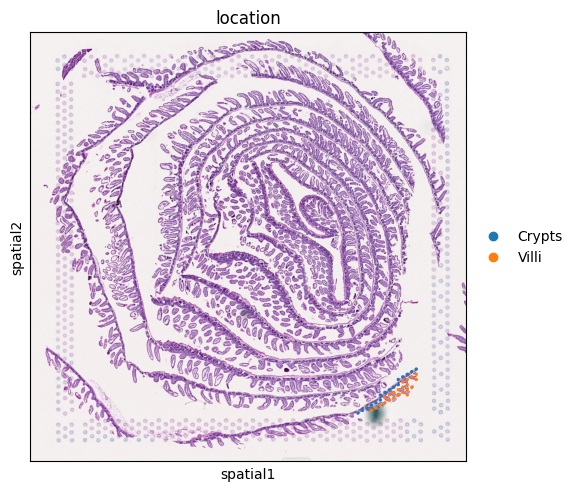

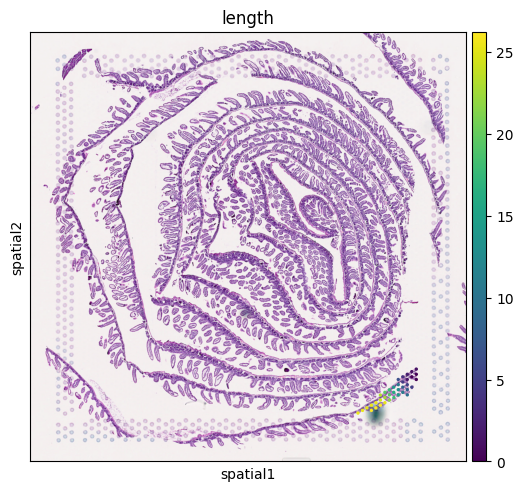

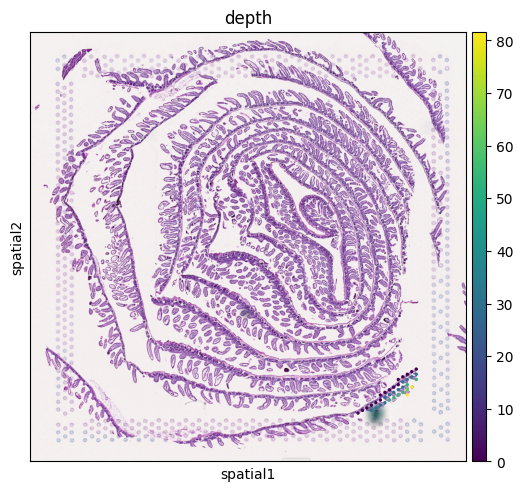

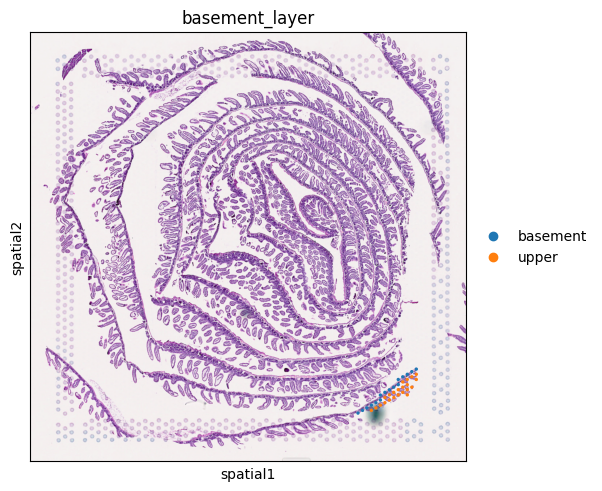

In [94]:
index =8
adjustedSpatial_datasets[index].uns.pop('basement_layer_colors')
sq.pl.spatial_scatter(adjustedSpatial_datasets[index], color = "location")
sq.pl.spatial_scatter(adjustedSpatial_datasets[index], color = "length")
sq.pl.spatial_scatter(adjustedSpatial_datasets[index], color = "depth")
sq.pl.spatial_scatter(adjustedSpatial_datasets[index], color = "basement_layer")


In [95]:
#Remove all the unlabelled and save

# adjustedSpatial_datasets[0][adjustedSpatial_datasets[0].obs['location'] != "unlabelled"].write("/datastore3/RossOlympia/paper_analysis_MergeSplitUnroll/naive_1_sections/section_0.h5ad")
# adjustedSpatial_datasets[1][adjustedSpatial_datasets[1].obs['location'] != "unlabelled"].write("/datastore3/RossOlympia/paper_analysis_MergeSplitUnroll/naive_1_sections/section_1.h5ad")
# adjustedSpatial_datasets[2][adjustedSpatial_datasets[2].obs['location'] != "unlabelled"].write("/datastore3/RossOlympia/paper_analysis_MergeSplitUnroll/naive_1_sections/section_2.h5ad")
# adjustedSpatial_datasets[3][adjustedSpatial_datasets[3].obs['location'] != "unlabelled"].write("/datastore3/RossOlympia/paper_analysis_MergeSplitUnroll/naive_1_sections/section_3.h5ad")
# adjustedSpatial_datasets[4][adjustedSpatial_datasets[4].obs['location'] != "unlabelled"].write("/datastore3/RossOlympia/paper_analysis_MergeSplitUnroll/naive_1_sections/section_4.h5ad")
# adjustedSpatial_datasets[5][adjustedSpatial_datasets[5].obs['location'] != "unlabelled"].write("/datastore3/RossOlympia/paper_analysis_MergeSplitUnroll/naive_1_sections/section_5.h5ad")
# adjustedSpatial_datasets[6][adjustedSpatial_datasets[6].obs['location'] != "unlabelled"].write("/datastore3/RossOlympia/paper_analysis_MergeSplitUnroll/naive_1_sections/section_6.h5ad")
# adjustedSpatial_datasets[7][adjustedSpatial_datasets[7].obs['location'] != "unlabelled"].write("/datastore3/RossOlympia/paper_analysis_MergeSplitUnroll/naive_1_sections/section_7.h5ad")
# adjustedSpatial_datasets[8][adjustedSpatial_datasets[8].obs['location'] != "unlabelled"].write("/datastore3/RossOlympia/paper_analysis_MergeSplitUnroll/naive_1_sections/section_8.h5ad")


In [96]:
#Merge them together
naive_merge = ad.concat(adjustedSpatial_datasets, label = 'unrolledSections', keys = ['0', '1', '2', '3', '4', '5', '6', '7', '8'],
                       uns_merge="first")
naive_merge[naive_merge.obs['location'] != "unlabelled"].write("/datastore3/RossOlympia/paper_analysis_MergeSplitUnroll/naive_1_sections/naive_merged_sections.h5ad")

/home1/2254704l/.local/lib/python3.10/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/home1/2254704l/.local/lib/python3.10/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/home1/2254704l/.local/lib/python3.10/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/home1/2254704l/.local/lib/python3.10/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c


In [86]:
naive_merge.uns['spatial'].items()

dict_items([('Day7', {'metadata': {'chemistry_description': 'Visium V1 Slide', 'software_version': 'spaceranger-2.1.1'}, 'images': {'hires': array([[[246, 242, 241],
        [246, 242, 241],
        [246, 242, 241],
        ...,
        [244, 241, 241],
        [244, 241, 241],
        [244, 241, 241]],

       [[246, 242, 241],
        [246, 242, 241],
        [246, 242, 241],
        ...,
        [244, 241, 241],
        [244, 241, 241],
        [244, 241, 241]],

       [[246, 242, 241],
        [246, 242, 241],
        [246, 242, 241],
        ...,
        [244, 241, 241],
        [244, 241, 241],
        [244, 241, 241]],

       ...,

       [[244, 241, 241],
        [244, 241, 241],
        [244, 241, 241],
        ...,
        [243, 239, 240],
        [243, 239, 239],
        [243, 239, 239]],

       [[244, 241, 241],
        [244, 241, 241],
        [244, 241, 240],
        ...,
        [244, 238, 239],
        [244, 238, 238],
        [244, 238, 238]],

       [[244, 241, 24

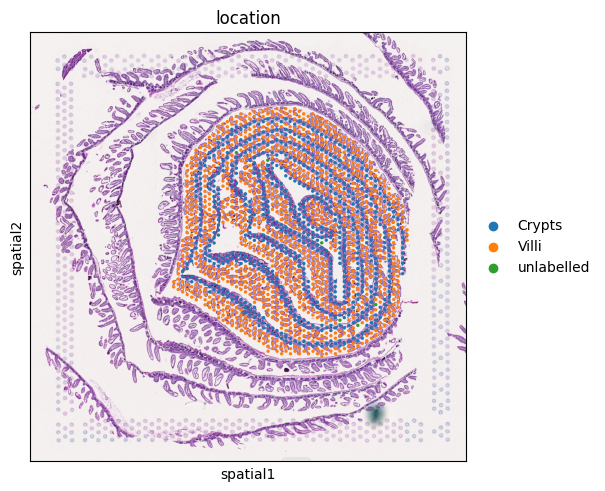

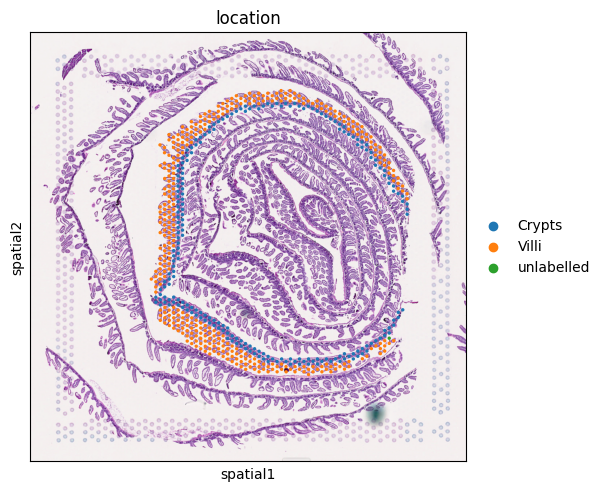

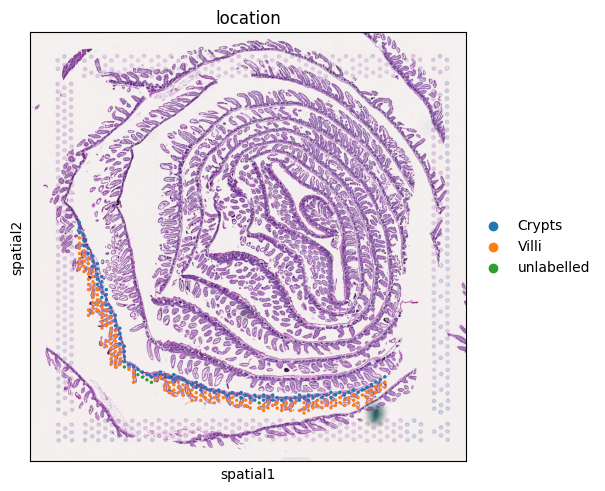

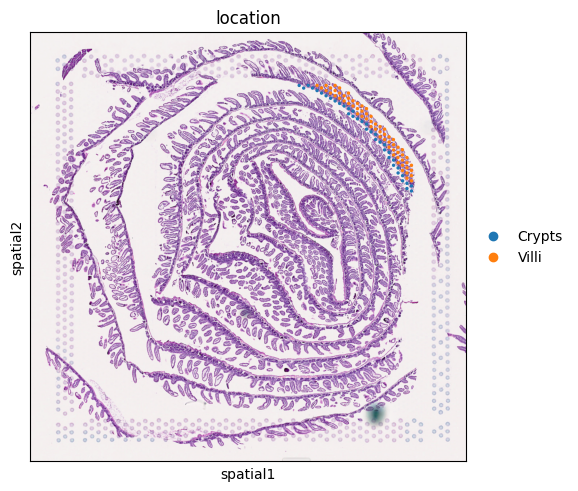

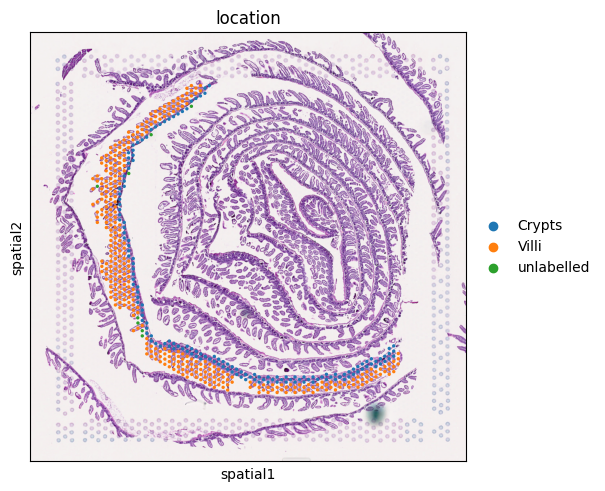

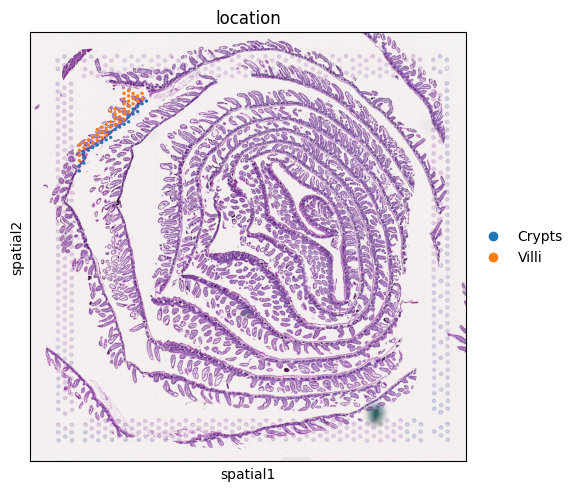

In [84]:
sq.pl.spatial_scatter(adjustedSpatial_datasets[0], color = "location")
sq.pl.spatial_scatter(adjustedSpatial_datasets[1], color = "location")
sq.pl.spatial_scatter(adjustedSpatial_datasets[2], color = "location")
sq.pl.spatial_scatter(adjustedSpatial_datasets[3], color = "location")
sq.pl.spatial_scatter(adjustedSpatial_datasets[4], color = "location")
sq.pl.spatial_scatter(adjustedSpatial_datasets[5], color = "location")
